<a href="https://colab.research.google.com/github/Aisyaululasmi/Assignment/blob/main/Assignment_2_PMA_Aisya_Ulul_Asmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 2 - Classification
##Pembelajaran Mesin dan Aplikasinya


###Nama : Aisya Ulul Asmi
###NIM : 25/564969/PPA/07123

1. Exploratory Data Analysis

Akan dilakukan EDA menggunakan dataset yang berbeda dengan yang saya gunakan pada tugas 1 karena dataset pada tugas 1 merupakan dataset dengan kategorik.

Dataset yang akan digunakan pada tugas ini adalah Parkinson's Disease Dataset dari UCI Machine Learning Repository.


In [1]:
# Download dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Memastikan hasil yang konsisten
np.random.seed(42)

# Memuat Dataset Parkinson's Disease
print("Memuat Dataset Parkinson's Disease")

# Definisikan path ke file data
file_path = 'parkinsons.data'

# Memuat dataset
df_parkinsons = pd.read_csv(file_path)

print("Dataset Parkinson's Disease berhasil dimuat. Preview data:")
print(df_parkinsons.head())
print(df_parkinsons.info())
print(df_parkinsons.describe())

# Pisahkan Fitur (X) dan Target (y)
# Hapus 'name' karena merupakan identifier, bukan fitur
# Kolom 'status' adalah target (1 : Parkinson, 0 : Sehat)

X_df = df_parkinsons.drop(['name', 'status'], axis=1)
y_df = df_parkinsons['status']

X = X_df.values
y = y_df.values

print(f"\nJumlah total fitur = {X.shape[1]}")
print(f"Target biner unik = {np.unique(y)}")
print("Dataset fitur dan target siap.")

Memuat Dataset Parkinson's Disease
Dataset Parkinson's Disease berhasil dimuat. Preview data:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  

Exploratory Data Analysis (Parkinson's Disease Dataset)

Distribusi Status (Variabel Target):
  0 (Sehat) : 48 sampel
  1 (Parkinson) : 147 sampel
Proporsi Parkinson : 0.75



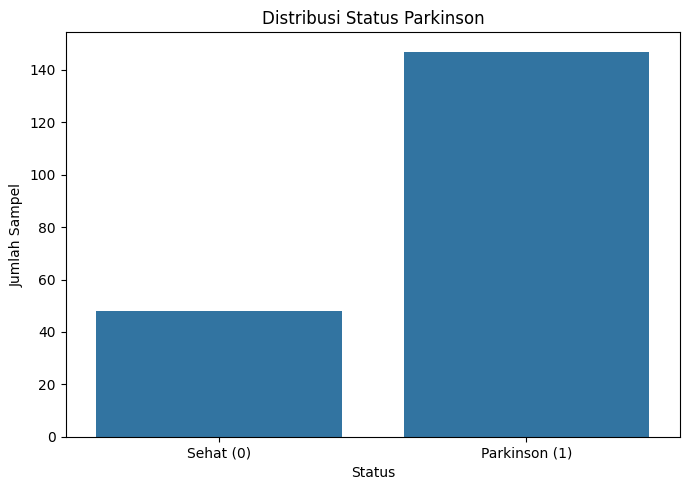

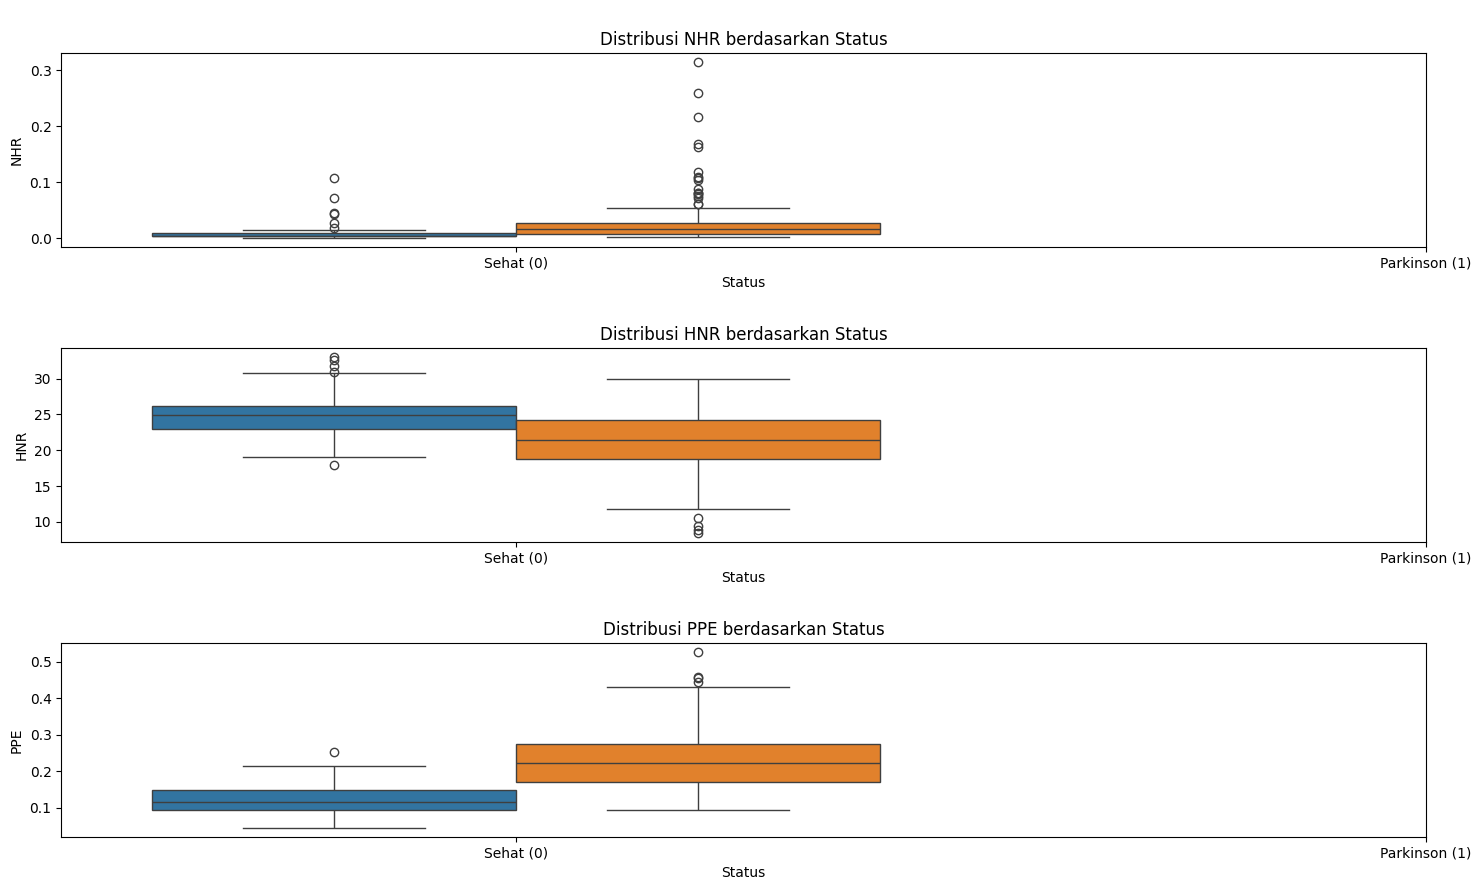

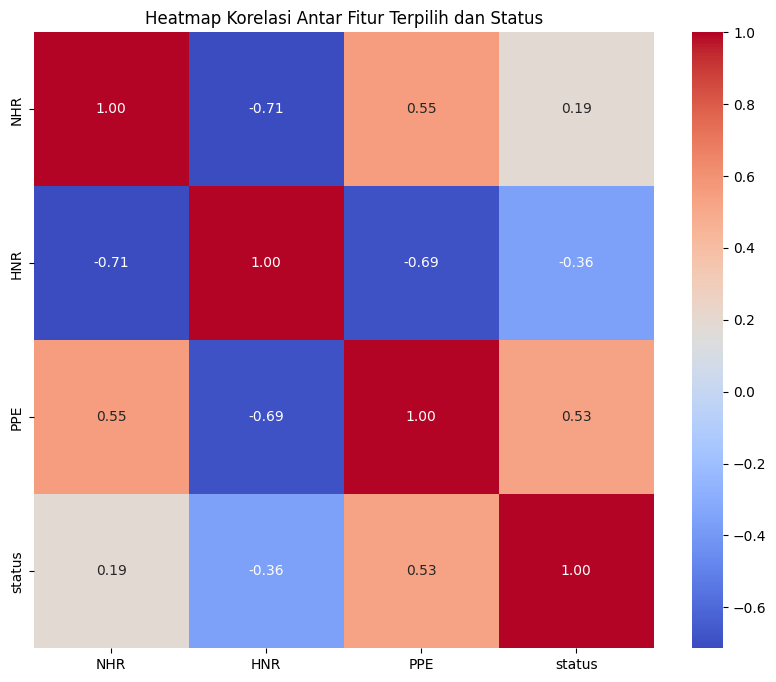

In [22]:
# 1. Eksplorasi Data Analysis (EDA)
print("Exploratory Data Analysis (Parkinson's Disease Dataset)")

# Distribusi Variabel Target
print("\nDistribusi Status (Variabel Target):")
status_counts = Counter(y)
print(f"  0 (Sehat) : {status_counts.get(0, 0)} sampel")
print(f"  1 (Parkinson) : {status_counts.get(1, 0)} sampel")
print(f"Proporsi Parkinson : {status_counts.get(1, 0) / len(y):.2f}\n")

# Visualisasi Distribusi Status
plt.figure(figsize=(7, 5))
sns.countplot(x=y)
plt.xticks(ticks=[0, 1], labels=['Sehat (0)', 'Parkinson (1)'])
plt.title('Distribusi Status Parkinson')
plt.xlabel('Status')
plt.ylabel('Jumlah Sampel')
plt.tight_layout()
plt.show()
print('\n')

# Dipilih beberapa fitur penting
selected_features_names = [
    'MDVP : Fo(Hz)', 'MDVP : Fhi(Hz)', 'MDVP : Flo(Hz)',
    'MDVP : Jitter(%)', 'MDVP : Shimmer', 'NHR', 'HNR', 'PPE'
]

# Cek fitur ada di daftar fitur (kolom X_df)
selected_features_names = [f for f in selected_features_names if f in X_df.columns]

if selected_features_names:
  plt.figure(figsize=(15, len(selected_features_names) * 3))
  for i, feature_name in enumerate(selected_features_names):
    plt.subplot(len(selected_features_names), 1, i + 1)
    # Create a temporary DataFrame for plotting
    plot_df = pd.DataFrame({feature_name: X_df[feature_name], 'status': y})
    sns.boxplot(hue='status', y=feature_name, data=plot_df, legend=False)
    plt.xticks(ticks=[0, 1], labels=['Sehat (0)', 'Parkinson (1)'])
    plt.title(f'\nDistribusi {feature_name} berdasarkan Status')
    plt.xlabel('Status')
    plt.ylabel(feature_name)
  plt.tight_layout()
  plt.show()
  print('\n')
else:
  print("\nFitur yang dipilih untuk visualisasi tidak ditemukan. Lewati plot box.")

# Heatmap Korelasi (fitur dan target dalam satu dataframe)
temp_df = X_df[selected_features_names].copy()
temp_df['status'] = y
correlation_matrix = temp_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Terpilih dan Status')
plt.show()

###Analisis EDA

* Distribusi Status

Berdasarkan distribusi status yang terlampir, dapat dilihat bahwa dataset ini menunjukkan ketidakseimbangan kelas yang signifikan, dengan lebih banyak sampel berlabel "Parkinson" (1) daripada "Sehat" (0).

* Box Plot Fitur per Status

Blox plot fitur per status menunjukkan bagaimana distribusi nilai fitur (mean, median, kuartil) berbeda antara individu sehat dan pengidap Parkinson. Perbedaan yang jelas di beberapa fitur mengindikasikan bahwa fitur-fitur ini berpotensi baik untuk klasifikasi.

* Heatmap Korelasi

Pada heatmap korelasi dapat dilihat bahwa terdapat hubungan linier antara fitur-fitur terpilih dan juga dengan variabel target status. Korelasi tinggi antara fitur dan status menunjukkan bahwa fitur tersebut penting.

2. Split data untuk training dan testing (80:20)


In [26]:
# 2. Split Data untuk Training dan Testing (80:20)

print("Data Splitting\n")

# Tentukan jumlah sampel
num_samples = len(X)
train_ratio = 0.8

# Buat indeks acak untuk split
np.random.seed(42)
indices = np.random.permutation(num_samples)

# Bagi indeks
num_train_samples = int(num_samples * train_ratio)
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

# Split data menggunakan indeks
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

print(f"Jumlah sampel training = {len(X_train)}")
print(f"Jumlah sampel testing = {len(X_test)}")
print(f"Shape X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Shape X_test = {X_test.shape}, y_test = {y_test.shape}")

# Cek distribusi target di train dan test set
print("\nDistribusi Status di Training Set")
print(Counter(y_train))
print("Distribusi Status di Testing Set")
print(Counter(y_test))

print("\nData berhasil dibagi untuk training dan testing.")

Data Splitting

Jumlah sampel training = 156
Jumlah sampel testing = 39
Shape X_train = (156, 22), y_train = (156,)
Shape X_test = (39, 22), y_test = (39,)

Distribusi Status di Training Set
Counter({np.int64(1): 117, np.int64(0): 39})
Distribusi Status di Testing Set
Counter({np.int64(1): 30, np.int64(0): 9})

Data berhasil dibagi untuk training dan testing.


##**Logistic Regression**

Logistic Regression

Iterasi 100/2000, Cost: 17.2694
Iterasi 200/2000, Cost: 5.7565
Iterasi 300/2000, Cost: 12.2874
Iterasi 400/2000, Cost: 16.9462
Iterasi 500/2000, Cost: 17.2694
Iterasi 600/2000, Cost: 17.2467
Iterasi 700/2000, Cost: 9.1094
Iterasi 800/2000, Cost: 5.7565
Iterasi 900/2000, Cost: 17.2694
Iterasi 1000/2000, Cost: 5.7565
Iterasi 1100/2000, Cost: 5.7565
Iterasi 1200/2000, Cost: 11.0728
Iterasi 1300/2000, Cost: 5.7565
Iterasi 1400/2000, Cost: 9.3749
Iterasi 1500/2000, Cost: 5.7565
Iterasi 1600/2000, Cost: 15.1256
Iterasi 1700/2000, Cost: 5.7565
Iterasi 1800/2000, Cost: 11.6356
Iterasi 1900/2000, Cost: 5.7565
Iterasi 2000/2000, Cost: 4.6639




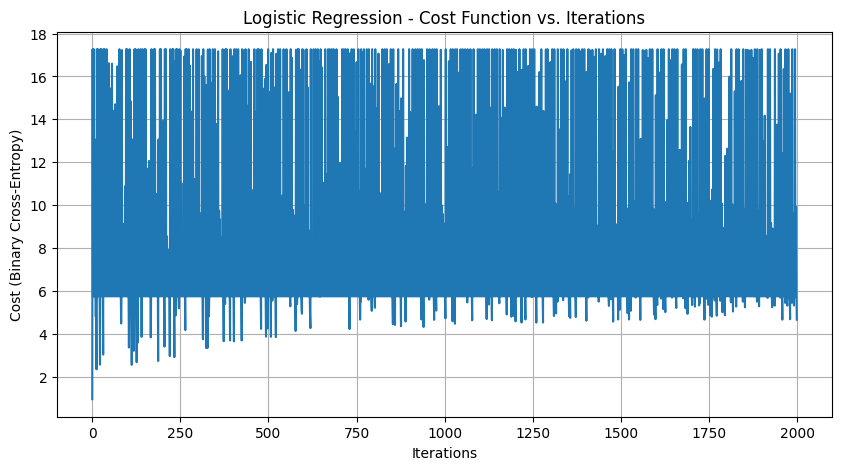


Prediksi Logistic Regression pada data test selesai.


In [29]:
# 3. Implementasi Logistic Regression (Klasifikasi Biner)
print("Logistic Regression\n")

class LogisticRegression:
  def __init__(self, learning_rate=0.01, n_iterations=1000):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.weights = None
    self.bias = None
    self.costs = [] # nilai cost selama training

  def _sigmoid(self, z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    n_samples, n_features = X.shape

    # Inisialisasi bobot dan bias secara acak
    self.weights = np.random.rand(n_features) * 0.01
    self.bias = 0.0

    for i in range(self.n_iterations):
      linear_model = np.dot(X, self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      epsilon = 1e-10
      cost = -np.mean(y * np.log(y_predicted + epsilon) + (1 - y) * np.log(1 - y_predicted + epsilon))
      self.costs.append(cost)

      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

      if (i + 1) % 100 == 0:
        print(f"Iterasi {i+1}/{self.n_iterations}, Cost: {cost:.4f}")

  def predict_proba(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    return self._sigmoid(linear_model)

  def predict(self, X, threshold=0.5):
    probabilities = self.predict_proba(X)
    return (probabilities >= threshold).astype(int)

# Inisialisasi dan Latih Model Logistic Regression
lr_model = LogisticRegression(learning_rate=0.01, n_iterations=2000) # Tingkatkan iterasi
lr_model.fit(X_train, y_train)

print('\n')

# Plot Cost Function
plt.figure(figsize=(10, 5))
plt.plot(range(len(lr_model.costs)), lr_model.costs)
plt.title('Logistic Regression - Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (Binary Cross-Entropy)')
plt.grid(True)
plt.show()

# Prediksi pada Data Test
y_pred_lr = lr_model.predict(X_test)

print("\nPrediksi Logistic Regression pada data test selesai.")

Analisis Logistic Regression:
* Model dilatih untuk memprediksi probabilitas status = 1 (Parkinson).
* Cost function Binary Cross-Entropy diplot, seharusnya menunjukkan penurunan.
* learning_rate dan n_iterations telah disesuaikan untuk dataset ini.

##**Gaussian Naïve Bayes**

In [33]:
# 4. Implementasi Naïve Bayes (Gaussian for Binary)
print("Gaussian Naïve Bayes")

class GaussianNaiveBayes:
  def __init__(self):
    self.prior = {}  # P(cj)
    self.mean = {}   # mean @feature @class
    self.std = {}    # standard deviation @feature @class
    self.classes = None

  def fit(self, X, y):
    self.classes = np.unique(y)
    n_samples, n_features = X.shape

    for cj in self.classes:
      X_c = X[y == cj] # Data class cj

      # Prior Probability P(cj) dgn Laplace Smoothing
      alpha = 1 # Laplace smoothing parameter
      num_unique_classes = len(self.classes)
      self.prior[cj] = (len(X_c) + alpha) / (n_samples + alpha * num_unique_classes)

      # Mean and std dev utk tiap feature di class cj
      self.mean[cj] = np.mean(X_c, axis=0)
      # Tambahkan epsilon utk menghindari nilai std dev mendekati nol
      self.std[cj] = np.std(X_c, axis=0) + 1e-9

  def _gaussian_probability(self, x, mean, std):
    # Probability Density Function (PDF) dari distribusi Gaussian
    exponent = -((x - mean)**2) / (2 * (std**2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(exponent)

  def predict_single_sample(self, x_new):
    log_posteriors = []

    for cj in self.classes:
      prior_cj = self.prior[cj]
      log_posterior = np.log(prior_cj) # log-prior

      for feature_idx in range(len(x_new)):
        mean_ij = self.mean[cj][feature_idx]
        std_ij = self.std[cj][feature_idx]

        # Gunakan log-probability utk numerical stability
        log_conditional_prob = np.log(self._gaussian_probability(x_new[feature_idx], mean_ij, std_ij))
        log_posterior += log_conditional_prob

      log_posteriors.append(log_posterior) # Jumlahkan semua total log-posterior

    return self.classes[np.argmax(log_posteriors)]

  def predict(self, X_test):
    predictions = [self.predict_single_sample(x) for x in X_test]
    return np.array(predictions)

# Inisialisasi dan training Gaussian Naïve Bayes Model
gnb_model = GaussianNaiveBayes()
gnb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_gnb = gnb_model.predict(X_test)

print("\nGaussian Naïve Bayes predictions on test data complete.")

Gaussian Naïve Bayes

Gaussian Naïve Bayes predictions on test data complete.


Analisis Gaussian Naïve Bayes
* Model ini menghitung prior probability dan parameter distribusi Gaussian (mean dan std) untuk setiap fitur, untuk kedua kelas (Sehat dan Parkinson).
* Menggunakan log-posterior untuk prediksi guna menghindari masalah underflow numerik.
* Laplace smoothing diterapkan pada prior probability.

##**Evaluasi Model Klasifikasi**

In [35]:
# Evaluasi Model Klasifikasi (Biner)
print("Evaluasi Model Klasifikasi (Biner)\n")

def calculate_metrics(y_true, y_pred, positive_class=1):
  # Hitung TP, TN, FP, FN
  tp = np.sum((y_true == positive_class) & (y_pred == positive_class))
  tn = np.sum((y_true != positive_class) & (y_pred != positive_class))
  fp = np.sum((y_true != positive_class) & (y_pred == positive_class))
  fn = np.sum((y_true == positive_class) & (y_pred != positive_class))

  print(f"TP (Kelas {positive_class}) : {tp}, TN (Kelas bukan {positive_class}) : {tn}, FP (Prediksi {positive_class} salah) : {fp}, FN (Prediksi bukan {positive_class} salah) : {fn}")

  accuracy = (tp + tn) / (tp + tn + fp + fn)

  # Hindari pembagian dengan nol
  precision = tp / (tp + fp) if (tp + fp) > 0 else 0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0
  f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  # Metrik untuk kelas 0 (Sehat)
  tp0 = tn # TP untuk kelas 0 adalah TN untuk kelas 1
  tn0 = tp # TN untuk kelas 0 adalah TP untuk kelas 1
  fp0 = fn # FP untuk kelas 0 adalah FN untuk kelas 1
  fn0 = fp # FN untuk kelas 0 adalah FP untuk kelas 1

  precision0 = tp0 / (tp0 + fp0) if (tp0 + fp0) > 0 else 0
  recall0 = tp0 / (tp0 + fn0) if (tp0 + fn0) > 0 else 0
  f1_score0 = (2 * precision0 * recall0) / (precision0 + recall0) if (precision0 + recall0) > 0 else 0

  return accuracy, precision, recall, f1_score, precision0, recall0, f1_score0

# Evaluasi Logistic Regression
print("Metrik Logistic Regression\n")
accuracy_lr, precision_lr, recall_lr, f1_lr, precision0_lr, recall0_lr, f10_lr = calculate_metrics(y_test, y_pred_lr, positive_class=1)
print(f"Akurasi = {accuracy_lr:.4f}")
print(f"Precision (Status=1) = {precision_lr:.4f}")
print(f"Recall (Status=1) = {recall_lr:.4f}")
print(f"F1-Measure (Status=1) = {f1_lr:.4f}")
print(f"Precision (Status=0) = {precision0_lr:.4f}")
print(f"Recall (Status=0) = {recall0_lr:.4f}")
print(f"F1-Measure (Status=0) = {f10_lr:.4f}")

# Evaluasi Gaussian Naïve Bayes
print("\nMetrik Gaussian Naïve Bayes\n")
accuracy_gnb, precision_gnb, recall_gnb, f1_gnb, precision0_gnb, recall0_gnb, f10_gnb = calculate_metrics(y_test, y_pred_gnb, positive_class=1)
print(f"Akurasi = {accuracy_gnb:.4f}")
print(f"Precision (Status=1) = {precision_gnb:.4f}")
print(f"Recall (Status=1) = {recall_gnb:.4f}")
print(f"F1-Measure (Status=1) = {f1_gnb:.4f}")
print(f"Precision (Status=0) = {precision0_gnb:.4f}")
print(f"Recall (Status=0) = {recall0_gnb:.4f}")
print(f"F1-Measure (Status=0) = {f10_gnb:.4f}")

Evaluasi Model Klasifikasi (Biner)

Metrik Logistic Regression

TP (Kelas 1) : 4, TN (Kelas bukan 1) : 8, FP (Prediksi 1 salah) : 1, FN (Prediksi bukan 1 salah) : 26
Akurasi = 0.3077
Precision (Status=1) = 0.8000
Recall (Status=1) = 0.1333
F1-Measure (Status=1) = 0.2286
Precision (Status=0) = 0.2353
Recall (Status=0) = 0.8889
F1-Measure (Status=0) = 0.3721

Metrik Gaussian Naïve Bayes

TP (Kelas 1) : 19, TN (Kelas bukan 1) : 8, FP (Prediksi 1 salah) : 1, FN (Prediksi bukan 1 salah) : 11
Akurasi = 0.6923
Precision (Status=1) = 0.9500
Recall (Status=1) = 0.6333
F1-Measure (Status=1) = 0.7600
Precision (Status=0) = 0.4211
Recall (Status=0) = 0.8889
F1-Measure (Status=0) = 0.5714


##Analisis Hasil

###**Logistic Regression**

* TP : 4, TN : 8, FP : 1, FN : 26
  * Total Sampel Test : 4 + 8 + 1 + 26 = 39
  * Actual Parkinson (Kelas 1) : TP + FN = 4 + 26 = 30
  * Actual Sehat (Kelas 0) : TN + FP = 8 + 1 = 9
  * Dari total sampel test sebanayak 39, 30 pasien mengidap Parkinson dan hanya 9 individu yang sehat. Hal ini menunjukkan ketidakseimbangan dataset tersebut.

* Akurasi = 0.3077

  Akurasi model Logistic Regression ini sangat rendah (sekitar 30.77%). Ini mengindikasikan bahwa model secara keseluruhan tidak memiliki kinerja yang baik dalam membuat prediksi yang benar.

* Metrik untuk Kelas 1 (Parkinson)
  * Precision = 0.8000
  
    Dari semua sampel yang diprediksi sebagai Parkinson, 80% di antaranya memang benar-benar Parkinson. Ini cukup baik, menunjukkan ketika model mengatakan seseorang menderita Parkinson, prediksinya cenderung benar.
  * Recall = 0.1333
  
    Dari semua individu yang sebenarnya menderita Parkinson, model hanya berhasil mendeteksi 13.33% di antaranya. Ini adalah angka yang sangat rendah dan merupakan masalah besar dalam konteks diagnosis penyakit. Artinya, model ini melewatkan sebagian besar kasus Parkinson (banyak False Negative).
  * F1-Measure = 0.2286
  
    F1-Measure yang sangat rendah ini mengkonfirmasi bahwa meskipun presisi cukup baik, rendahnya recall sangat merugikan kinerja keseluruhan untuk kelas positif.

* Metrik untuk Kelas 0 (Sehat)
  * Precision = 0.2353
  
    Dari semua sampel yang diprediksi sebagai Sehat, hanya 23.53% yang benar-benar sehat. Ini sangat buruk, menunjukkan bahwa model seringkali salah mengklasifikasikan individu sehat sebagai sakit (False Positive).
  * Recall = 0.8889
  
    Dari semua individu yang sebenarnya Sehat, model berhasil mengidentifikasi 88.89% di antaranya sebagai Sehat. Ini adalah recall yang sangat tinggi untuk kelas 0.
  * F1-Measure = 0.3721

    Meskipun recall kelas 0 tinggi, precision yang sangat rendah menurunkan F1-Measure.

Model Logistic Regression ini tampaknya memiliki bias yang kuat untuk memprediksi kelas 1 (Parkinson), namun dengan recall yang sangat buruk untuk kelas 1 dan precision yang sangat buruk untuk kelas 0. Tingginya recall untuk kelas 0 dengan precision yang sangat rendah menunjukkan bahwa model ini cenderung memprediksi hampir semuanya sebagai kelas 0, tetapi karena kelas 1 adalah mayoritas, hal ini menyebabkan banyak FN untuk kelas 1 dan FP untuk kelas 0. Akurasi yang sangat rendah menguatkan kesimpulan ini. Ada kemungkinan learning rate atau jumlah iterasi yang tidak optimal, atau model ini hanya terlalu sederhana untuk data tersebut.

###**Gaussian Naïve Bayes**

* TP : 19, TN : 8, FP : 1, FN : 11
  * Total Sampel Test : 19 + 8 + 1 + 11 = 39
  * Actual Parkinson : TP + FN = 19 + 11 = 30
  * Actual Sehat : TN + FP = 8 + 1 = 9
  * Dari total sampel test sebanayak 39, 30 pasien mengidap Parkinson dan hanya 9 individu yang sehat. Hal ini menunjukkan ketidakseimbangan dataset tersebut.

* Akurasi = 0.6923

  Akurasi Gaussian Naïve Bayes jauh lebih baik dibandingkan Logistic Regression (sekitar 69.23%). Ini menunjukkan peningkatan signifikan dalam kemampuan model untuk membuat prediksi yang benar secara keseluruhan.

* Metrik untuk Kelas 1 (Parkinson)
  * Precision = 0.9500

    Dari semua sampel yang diprediksi sebagai Parkinson, 95% di antaranya memang benar. Ini sangat tinggi dan sangat baik, menunjukkan keandalan yang luar biasa ketika model mendiagnosis Parkinson.
  * Recall = 0.6333

    Dari semua individu yang sebenarnya menderita Parkinson, model berhasil mendeteksi 63.33% di antaranya. Ini jauh lebih baik daripada Logistic Regression, tetapi masih berarti sekitar sepertiga kasus Parkinson terlewatkan (False Negative).
  * F1-Measure = 0.7600

    F1-Measure yang baik ini mencerminkan keseimbangan yang jauh lebih baik antara precision dan recall untuk kelas Parkinson.

* Metrik untuk Kelas 0 (Sehat)
  * Precision = 0.4211

    Dari semua sampel yang diprediksi sebagai Sehat, 42.11% yang benar-benar sehat. Ini lebih baik daripada Logistic Regression, tetapi masih menunjukkan bahwa model membuat beberapa false positive (mengklasifikasikan orang sehat sebagai sakit) yang signifikan.
  * Recall = 0.8889

    Dari semua individu yang sebenarnya Sehat, model berhasil mengidentifikasi 88.89% di antaranya sebagai Sehat. Recall untuk kelas minoritas ini sangat tinggi, menunjukkan model cukup baik dalam "tidak salah mendiagnosis" orang sehat sebagai sakit jika memang mereka sehat.
  * F1-Measure = 0.5714

    F1-Measure yang lumayan ini menunjukkan ada kompromi antara precision dan recall untuk kelas 0.

Gaussian Naïve Bayes menunjukkan kinerja yang jauh lebih unggul dibandingkan dengan model Logistic Regression. Model ini memiliki presisi yang sangat tinggi untuk kelas 1, yang sangat berharga dalam diagnosis medis (minimnya False Positive Parkinson). Meskipun recall untuk kelas 1 masih bisa ditingkatkan, ini jauh lebih baik dari Logistic Regression. Tingginya recall untuk kelas 0 juga positif, tetapi precision yang lebih rendah untuk kelas 0 mengindikasikan bahwa model ini masih cenderung menghasilkan false positive yang berarti (memprediksi 'Parkinson' padahal 'Sehat'). Asumsi independensi fitur Gaussian Naïve Bayes mungkin bekerja cukup baik untuk dataset ini, atau data memiliki distribusi yang cukup dekat dengan Gaussian per kelas.


###Kesimpulan

Dalam tugas ini, Gaussian Naïve Bayes adalah model yang jauh lebih superior dibandingkan Logistic Regression untuk mengklasifikasikan penyakit Parkinson pada dataset yang diberikan. Kinerjanya yang lebih baik, terutama dalam hal akurasi dan F1-Measure untuk kelas Parkinson, menunjukkan bahwa asumsi Naïve Bayes dan cara kerjanya lebih cocok untuk karakteristik data ini. Meskipun demikian, recall untuk kelas Parkinson masih membutuhkan peningkatan untuk menjadi aplikasi diagnosis yang benar-benar andal, mungkin dengan teknik resampling untuk mengatasi ketidakseimbangan kelas atau penggunaan model yang lebih canggih.
